In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing



In [ ]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl==3.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
shopping_df = pd.read_excel("Project1_Data.xlsx")

In [ ]:
shopping_df

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,14606550,99,3,2,3,3,0,1,1,0,37923,84.89,jcpenney.com,llbean.com,NaN,NaN,NaN
2182,14590791,99,2,3,7,7,1,1,1,0,43351,200.88,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2183,14917811,1,4,2,3,2,0,1,0,0,99338,161.88,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2184,14656919,99,4,2,11,7,0,1,1,0,94114,335.00,oldnavy.com,llbean.com,NaN,NaN,NaN


In [ ]:
shopping_df_drop=shopping_df.drop(['site1', 'site2', 'site3', 'site4', 'site5'], axis = 1)
shopping_df_drop

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,14606550,99,3,2,3,3,0,1,1,0,37923,84.89
2182,14590791,99,2,3,7,7,1,1,1,0,43351,200.88
2183,14917811,1,4,2,3,2,0,1,0,0,99338,161.88
2184,14656919,99,4,2,11,7,0,1,1,0,94114,335.00


In [ ]:
shopping_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userid      2186 non-null   int64  
 1   education   2186 non-null   int64  
 2   region      2186 non-null   int64  
 3   hhsz        2186 non-null   int64  
 4   age         2186 non-null   int64  
 5   income      2186 non-null   int64  
 6   child       2186 non-null   int64  
 7   race        2186 non-null   int64  
 8   connection  2186 non-null   int64  
 9   country     2186 non-null   int64  
 10  zipcode     2186 non-null   int64  
 11  money       2186 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 205.1 KB


In [ ]:
shopping_df_drop.set_index('userid', inplace=True)
shopping_df_drop = shopping_df_drop.apply(lambda x: x.astype('float64'))


In [ ]:
shopping_df_drop_norm = shopping_df_drop.apply(preprocessing.scale, axis=0)
shopping_df_drop_norm

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
userid,,,,,,,,,,,
14840503,0.583954,1.639085,1.364171,-0.290355,-1.433249,0.600954,-0.149263,0.281968,-0.392646,1.834633,0.100491
12890751,-1.681754,-0.254199,-0.943343,0.353374,-0.381879,0.600954,-0.149263,0.281968,-0.392646,0.152595,-0.522412
13129562,-1.681754,-0.254199,0.594999,0.353374,0.143806,0.600954,-0.149263,0.281968,-0.392646,0.787572,-0.126359
12910664,0.583954,0.692443,0.594999,-0.934084,-1.433249,0.600954,-0.149263,0.281968,-0.392646,-0.345455,-0.561349
13601071,0.583954,0.692443,-0.174172,0.031509,-0.381879,-1.664021,-0.149263,0.281968,-0.392646,-0.053894,0.287011
...,...,...,...,...,...,...,...,...,...,...,...
14606550,0.583954,0.692443,-0.943343,-1.255949,-0.907564,-1.664021,-0.149263,0.281968,-0.392646,-0.126449,-0.644501
14590791,0.583954,-0.254199,-0.174172,0.031509,1.195176,0.600954,-0.149263,0.281968,-0.392646,0.060200,-0.493706
14917811,-1.753302,1.639085,-0.943343,-1.255949,-1.433249,-1.664021,-0.149263,-3.546497,-0.392646,1.985382,-0.544409


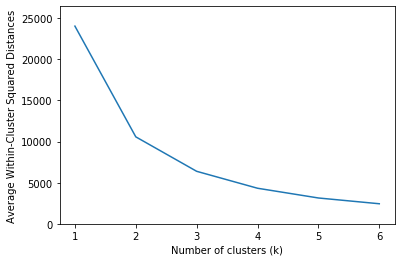

In [ ]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(shopping_df_drop_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(shopping_df_drop_norm)

# Cluster membership
memb = pd.DataFrame(kmeans.labels_, index=shopping_df_drop_norm.index)

# Choosing customers who belong to cluster 0 for running association rules 

In [ ]:
memb['clusterID'] = kmeans.labels_
memb

,0,clusterID
userid,,
14840503,0,0
12890751,0,0
13129562,0,0
12910664,0,0
13601071,2,2
...,...,...
14606550,2,2
14590791,0,0
14917811,3,3


In [ ]:
df = pd.merge(shopping_df, memb, on = 'userid')
df.head()

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5,0,clusterID
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN,0,0
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN,0,0
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN,0,0
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN,0,0
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN,2,2


In [ ]:
memb_list=df.query("clusterID == 0")
memb_list.head()

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5,0,clusterID
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN,0,0
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN,0,0
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN,0,0
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN,0,0
6,15537454,99,3,2,9,7,1,1,1,0,26037,354.30,landsend.com,llbean.com,NaN,NaN,NaN,0,0
